In [1]:
import os
import pandas as pd
import cv2
from skimage.measure import compare_ssim
from matplotlib import pyplot as plt

In [2]:
classes = sorted([i for i in os.listdir('./original_pictures') if i[0] is not '.' if os.path.isdir('./original_pictures/'+i)])
classes

['01_nakseong',
 '02_scuba',
 '03_osteria',
 '04_houskewer',
 '05_gravy',
 '06_jungga',
 '07_edonggan',
 '08_hwanyeo',
 '09_badarang',
 '10_sushimura',
 '11_ugo',
 '12_kingsjokbal']

In [3]:
#동일한 크기를 갖는 파일 목록
dup_photo = pd.DataFrame(columns=['filename', 'size'])
for i in classes:
    photo_list = os.listdir('./original_pictures/'+i)
    photo_size = [os.path.getsize('./original_pictures/'+i+'/'+x) for x in photo_list]
    photo = pd.DataFrame({'filename':photo_list, 'size':photo_size})
    if len(photo) != len(set(photo_size)):#중복된 사이즈가 있을때
        temp = pd.DataFrame(photo['size'].value_counts()>1)
        dup_size = list(temp[temp['size']==True].index)
        for j in range(len(dup_size)):
            dup_photo = pd.concat([dup_photo, photo[photo['size']==dup_size[j]]])
dup_photo.reset_index(drop=True, inplace=True)
dup_photo['path'] = './original_pictures/'+dup_photo.filename.str.split('_').str[0]+'_'+dup_photo.filename.str.split('_').str[1]+'/'

In [4]:
dup_photo.head()

,filename,size,path
0,01_nakseong_0140.jpg,134532,./original_pictures/01_nakseong/
1,01_nakseong_0316.jpg,134532,./original_pictures/01_nakseong/
2,06_jungga_0148.jpg,28997,./original_pictures/06_jungga/
3,06_jungga_0256.jpg,28997,./original_pictures/06_jungga/
4,07_edonggan_0064.jpg,55716,./original_pictures/07_edonggan/


In [5]:
uniq = dup_photo[['size', 'path']].drop_duplicates().reset_index(drop=True)
uniq.head()

,size,path
0,134532,./original_pictures/01_nakseong/
1,28997,./original_pictures/06_jungga/
2,55716,./original_pictures/07_edonggan/
3,57464,./original_pictures/07_edonggan/
4,317580,./original_pictures/07_edonggan/


C:\Users\sadie\anaconda3\envs\TF21\lib\site-packages\ipykernel_launcher.py:10: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  # Remove the CWD from sys.path while we load stuff.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


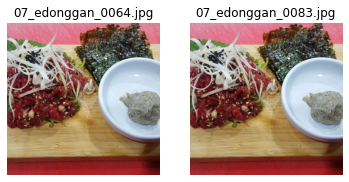

사진이 중복되어, 오른쪽 그림을 삭제합니다.


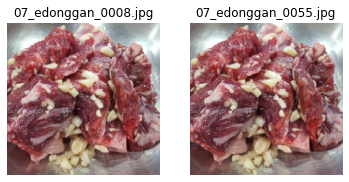

사진이 중복되어, 오른쪽 그림을 삭제합니다.


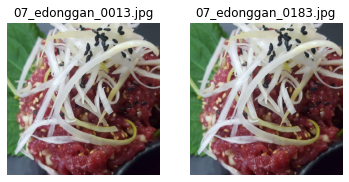

사진이 중복되어, 오른쪽 그림을 삭제합니다.


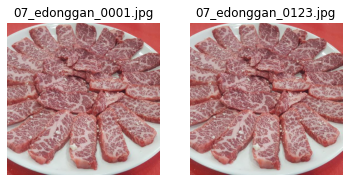

사진이 중복되어, 오른쪽 그림을 삭제합니다.


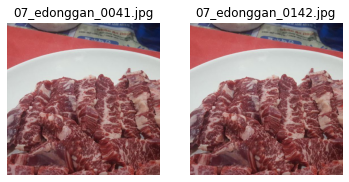

사진이 중복되어, 오른쪽 그림을 삭제합니다.


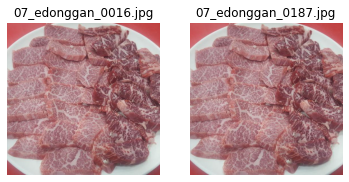

사진이 중복되어, 오른쪽 그림을 삭제합니다.


In [6]:
for i in range(len(uniq)):
    temp = dup_photo[(dup_photo['size']==uniq['size'][i]) & (dup_photo['path']==uniq['path'][i])].reset_index(drop=True)
    img0 = cv2.imread(temp['path'][0]+temp['filename'][0])
    img0 = cv2.cvtColor(img0, cv2.COLOR_BGR2RGB)
    img_gray0 = cv2.cvtColor(img0, cv2.COLOR_RGB2GRAY)
    img1 = cv2.imread(temp['path'][1]+temp['filename'][1])
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img_gray1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
    if img_gray0.shape == img_gray1.shape:
        score, diff = compare_ssim(img_gray0, img_gray1, full=True)
        if score > 0.99:
            fig = plt.figure()
            rows, cols = 1, 2
            
            ax1 = fig.add_subplot(rows,cols,1)
            ax1.imshow(img0)
            ax1.set_title(temp['filename'][0])
            ax1.axis('off')
            
            ax2=fig.add_subplot(rows,cols,2)
            ax2.imshow(img1)
            ax2.set_title(temp['filename'][1])
            ax2.axis('off')
            
            plt.show()
            print('사진이 중복되어, 오른쪽 그림을 삭제합니다.')
            os.remove(temp['path'][1]+temp['filename'][1])

In [8]:
#이름 변경(class_이름_사진번호)
'''0:04d를 0:05d로 변경해서 실행한 후, 다시 0:04d로 변경해서 실행'''
for store in classes:
    for i, file in enumerate(os.listdir('./original_pictures/'+store)):
        os.rename('./original_pictures/'+store+'/'+file, './original_pictures/'+store+'/'+store+'_{0:04d}.jpg'.format(i+1))